In [1]:
! pip install nltk

In [2]:
from google.colab import files
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize 
import string
import re
from nltk.corpus import stopwords
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
uploaded = files.upload()

Saving cleaned_dataset.csv to cleaned_dataset.csv


In [4]:
df = pd.read_csv('cleaned_dataset.csv')

In [5]:
df.shape

(45600, 2)

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(45599, 2)

In [8]:
# df.label = df.label.astype(int)

In [9]:
df.head()

,post,label
0,simply copy and paste the following text into ...,0
1,in order to help increase the booklets downloa...,0
2,as of march 13th 2014 the booklet had been dow...,0
3,click below for a free download of a colorfull...,1
4,click on the download 7 42 mb green banner link,0


## Pre-processing text data

- Most of the text data are cleaned by following below steps:
    1. Lammetization - Tranforming any form of a word to its root word
    2. Tokenization - Converting a sentence into list of words
    3. Remove punctuations
    4. Remove stopwords

In [10]:
nltk.download('punkt')
def tokenization(text):
  return word_tokenize(text.lower())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
def remove_punct_digits(text):
    text = [re.sub(r'[^a-zA-z\s]', '', word) for word in text]
    text = [word for word in text if len(word)>0] # delete empty words
    return text

In [12]:
nltk.download('stopwords')
def remove_stopwords(text):
    stopword = stopwords.words('english')
    text = [word for word in text if word not in stopword]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
nlp = spacy.load('en')
def lemmatizer(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [14]:
df['post_clean'] = df['post'].apply(lambda x: lemmatizer(x))

In [15]:
df['post_clean'] = df['post_clean'].apply(lambda x: tokenization(x))

In [16]:
df['post_clean'] = df['post_clean'].apply(lambda x: remove_punct_digits(x))

In [17]:
df['post_clean'] = df['post_clean'].apply(lambda x: remove_stopwords(x))
df.head()

,post,label,post_clean
0,simply copy and paste the following text into ...,0,"[simply, copy, paste, follow, text, youtube, v..."
1,in order to help increase the booklets downloa...,0,"[order, help, increase, booklet, download, wou..."
2,as of march 13th 2014 the booklet had been dow...,0,"[march, th, booklet, download, time, counting]"
3,click below for a free download of a colorfull...,1,"[click, free, download, colorfully, illustrate..."
4,click on the download 7 42 mb green banner link,0,"[click, download, mb, green, banner, link]"


## Exploratory Data Analysis

### Posts length 

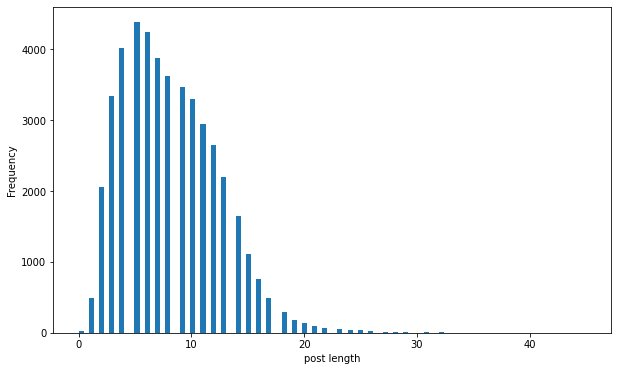

In [18]:
df['post_length'] = df['post_clean'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
df['post_length'].plot(
    kind='hist',
    bins=100);
plt.xlabel('post length')
df.drop(columns=['post_length'], axis=1, inplace=True)

In [19]:
df_bully = df[df['label']==1].reset_index().drop(columns='index')
df_nbully = df[df['label']==0].reset_index().drop(columns='index')

In [20]:
cnt1 = Counter()
for i in range (len(df_bully)):
    for word in df_bully.post_clean.loc[[i]].tolist()[0]:
        cnt1[word] += 1
print(cnt1.most_common(50))

[('bitch', 11400), ('``', 4667), ('hoe', 4208), ('get', 3236), ('like', 2876), ('pussy', 2246), ('fuck', 1859), ('go', 1618), ('ass', 1609), ('shit', 1360), ('nigga', 1281), ('u', 1229), ('say', 1114), ('lol', 1025), ('know', 1018), ('girl', 966), ('make', 926), ('sexist', 910), ('_', 882), ('woman', 878), ('amp', 843), ('one', 808), ('man', 806), ('want', 805), ('mkr', 803), ('think', 800), ('see', 796), ('call', 784), ('look', 768), ('would', 750), ('niggas', 739), ('love', 713), ('good', 678), ('white', 674), ('bad', 668), ('hate', 603), ('yo', 602), ('need', 592), ('talk', 586), ('tell', 559), ('come', 547), ('faggot', 544), ('time', 517), ('take', 506), ('fucking', 502), ('people', 497), ('never', 487), ('ya', 483), ('trash', 480), ('back', 479)]


In [21]:
cnt2 = Counter()
for i in range (len(df_nbully)):
    for word in df_nbully.post_clean.loc[[i]].tolist()[0]:
        cnt2[word] += 1
print(cnt2.most_common(50))

[('mkr', 3420), ('``', 1914), ('get', 1554), ('like', 1442), ('go', 1357), ('white', 1233), ('would', 952), ('see', 935), ('people', 933), ('one', 892), ('make', 811), ('say', 778), ('think', 772), ('good', 764), ('look', 743), ('trash', 714), ('know', 700), ('time', 674), ('n', 609), ('want', 597), ('amp', 594), ('kat', 575), ('well', 535), ('year', 517), ('bird', 479), ('take', 470), ('need', 468), ('thing', 457), ('woman', 447), ('day', 436), ('man', 434), ('black', 427), ('youtube', 425), ('back', 416), ('come', 413), ('watch', 403), ('really', 400), ('new', 397), ('find', 393), ('use', 389), ('andre', 386), ('show', 380), ('talk', 376), ('way', 360), ('try', 355), ('even', 355), ('love', 347), ('never', 341), ('give', 337), ('work', 335)]


In [22]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

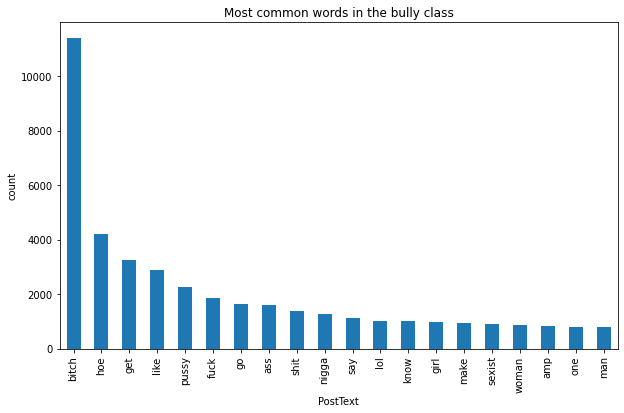

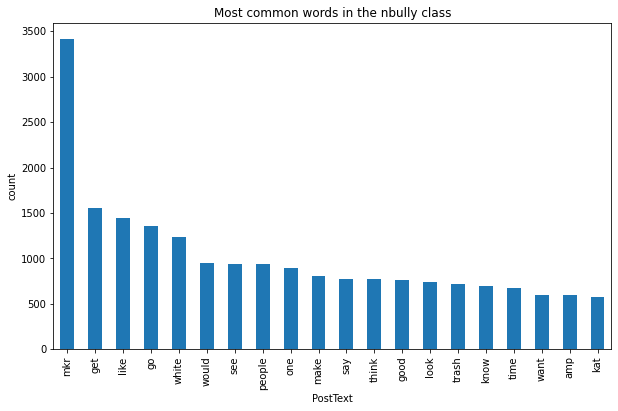

In [23]:
 df['post_clean'] = df['post_clean'].apply(lambda x: ' '.join(x))
df_bully['post_clean'] = df_bully['post_clean'].apply(lambda x: ' '.join(x))
df_nbully['post_clean'] = df_nbully['post_clean'].apply(lambda x: ' '.join(x))

common_words_bully = get_top_n_trigram(df_bully['post_clean'], 20)
common_words_nbully = get_top_n_trigram(df_nbully['post_clean'], 20)

plt.figure(figsize=(10, 6))
df_bully_common = pd.DataFrame(common_words_bully, columns = ['PostText' , 'count'])
df_bully_common.groupby('PostText').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plt.title('Most common words in the bully class')
plt.ylabel('count')

plt.figure(figsize=(10, 6))
df_nbully_common = pd.DataFrame(common_words_nbully, columns = ['PostText' , 'count'])
df_nbully_common.groupby('PostText').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plt.title('Most common words in the nbully class')
plt.ylabel('count');

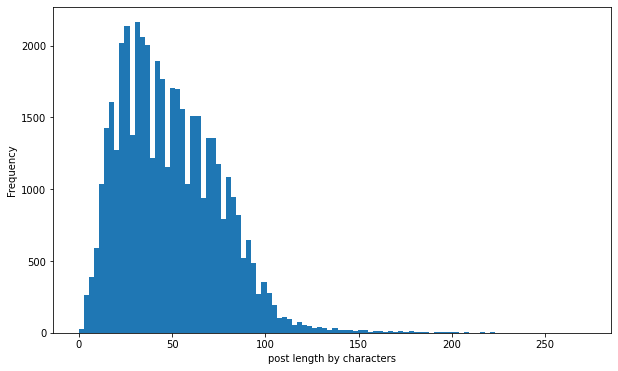

In [24]:
df['post_length'] = df['post_clean'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
df['post_length'].plot(
    kind='hist',
    bins=100);
plt.xlabel('post length by characters')
df.drop(columns=['post_length'], axis=1, inplace=True)

### Wordcloud Visualization

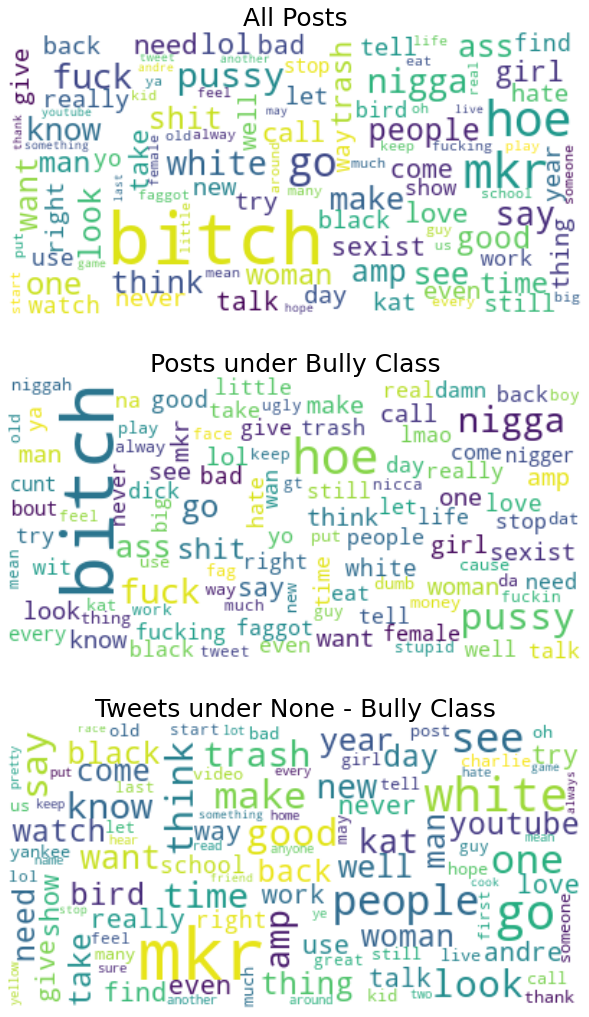

In [25]:
post_all = " ".join(post for post in df.post_clean)
post_bully = " ".join(post for post in df_bully.post_clean)
post_nbully = " ".join(post for post in df_nbully.post_clean)

fig, ax = plt.subplots(3, 1, figsize  = (20,18))
# Create and generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(post_all)
wordcloud_bully = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(post_bully)
wordcloud_nbully = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(post_nbully)

# Display the generated image:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Posts', fontsize=25)
ax[0].axis('off')
ax[1].imshow(wordcloud_bully, interpolation='bilinear')
ax[1].set_title('Posts under Bully Class',fontsize=25)
ax[1].axis('off')
ax[2].imshow(wordcloud_nbully, interpolation='bilinear')
ax[2].set_title('Tweets under None - Bully Class',fontsize=25)
ax[2].axis('off');

In [26]:
y = df['label']

In [27]:
X = df['post_clean']

In [28]:
X.head()

0    simply copy paste follow text youtube videos d...
1    order help increase booklet download would gre...
2              march th booklet download time counting
3    click free download colorfully illustrate page...
4                  click download mb green banner link
Name: post_clean, dtype: object

In [29]:
X.shape, y.shape

((45599,), (45599,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# Max length of words in each tweet.
MAX_SEQUENCE_LENGTH = 25

In [32]:
# tokenize the sentences
tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(X_train)
X_train_vec = tokenizer.texts_to_sequences(X_train)
X_test_vec = tokenizer.texts_to_sequences(X_test)

# pad the sequences
X_train_vec = pad_sequences(X_train_vec, maxlen=MAX_SEQUENCE_LENGTH)
X_test_vec = pad_sequences(X_test_vec, maxlen=MAX_SEQUENCE_LENGTH)

# RNN - LSTM network model

In [33]:
model = Sequential()
model.add(Embedding(input_dim = (len(tokenizer.word_counts) + 1), output_dim = 128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
model.input_shape, X_train_vec.shape

((None, 25), (36479, 25))

In [35]:
model.output_shape, y_train.shape

((None, 1), (36479,))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 128)           4202624   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,482,305
Trainable params: 4,482,305
Non-trainable params: 0
_________________________________________________________________


In [37]:
epochs = 20
batch_size = 64
# checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# es = EarlyStopping(monitor='val_loss', patience=10)
# callbacks_list = [es]
history = model.fit(X_train_vec, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size)


Epoch 1/20
456/456 [==============================] - 76s 168ms/step - loss: 0.2855 - acc: 0.8790 - val_loss: 0.2378 - val_acc: 0.9056
Epoch 2/20
456/456 [==============================] - 76s 166ms/step - loss: 0.1425 - acc: 0.9459 - val_loss: 0.2586 - val_acc: 0.8969
Epoch 3/20
456/456 [==============================] - 75s 164ms/step - loss: 0.0876 - acc: 0.9675 - val_loss: 0.3207 - val_acc: 0.9020
Epoch 4/20
456/456 [==============================] - 76s 167ms/step - loss: 0.0539 - acc: 0.9801 - val_loss: 0.3555 - val_acc: 0.8956
Epoch 5/20
456/456 [==============================] - 81s 177ms/step - loss: 0.0380 - acc: 0.9860 - val_loss: 0.3705 - val_acc: 0.8862
Epoch 6/20
456/456 [==============================] - 76s 167ms/step - loss: 0.0246 - acc: 0.9910 - val_loss: 0.5358 - val_acc: 0.8861
Epoch 7/20
456/456 [==============================] - 75s 165ms/step - loss: 0.0201 - acc: 0.9925 - val_loss: 0.6437 - val_acc: 0.8858
Epoch 8/20
456/456 [==============================] - 7

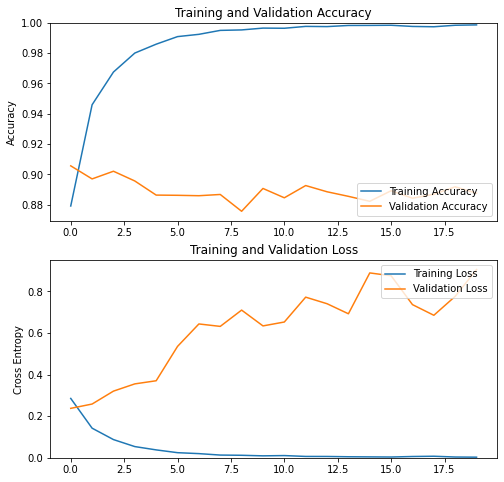

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [39]:
new_tweet = ['This is our final project at ITC']
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
y_pred = model.predict(padded)
y_pred

array([[2.930345e-09]], dtype=float32)

This model overfit.
